<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw2_second_fd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
- Goal:
    - Learn the second order derivative approximation: second order central finite difference
    - Understand convergence rate


# Problem 

Let $f(x) = \sin x$. Plot $f''$ and $\delta_{-h} \delta_h f$ with $h = .5$

# Anal


One of the commonly used FD for $f''$ is the following:
$$f''(x) = \frac{d}{dx} f'(x) \simeq \delta_h f'(x) \simeq \delta_h \delta_{-h} f(x).$$
If we write it explicitly, then
$$f''(x) \simeq \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}.$$

__Prop__

The central finite difference for the second order has convergence order $1$.

__Proof__ 

(abs val sign?)

Need to show $$|\frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}-f''(x)|=O(h)$$

First have
$$LHS=|\frac{f(x+h)-2f(x)+f(x-h)-h^2f''(x)}{h^2}|=|\frac{f(x+h)+f(x-h)-2f(x)-h^2f''(x)}{h^2}|$$

Using Taylor series, have
$$f(x+h)=f(x)+h f(x)+\frac{h^2}{2}f''(x)+\frac{h^3}{3!}f^{(3)}(x)+O(h^4)$$
$$f(x-h)=f(x)-h f(x)+\frac{h^2}{2}f''(x)-\frac{h^3}{3!}f^{(3)}(x)+O(h^4)$$

Thus
$$f(x+h)+f(x-h)=2 f(x)+h^2f''(x)+O(h^4)$$

Then
$$LHS=|\frac{2 f(x)+h^2f''(x)+O(h^4)-2 f(x)-h^2f''(x)}{h^2}|=|\frac{O(h^4)}{h^2}|=O(h^2)$$

__Disproved__

# Code

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def sfd(f, x, h):
    return (f(x + h) - 2*f(x) + f(x - h)) / h**2


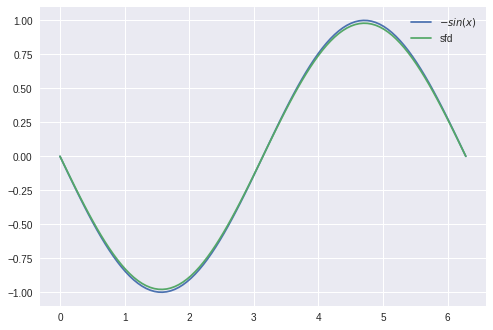

In [7]:
'''
    x_cod: points at which the derivative to be computed
    y_cod: estimated derivative by finite difference
'''



h = .5 #step size

x_co = np.linspace(0, 2*np.pi, 100)
plt.plot(x_co, - np.sin(x_co), label = '$-sin(x)$');
plt.plot(x_co, sfd(np.sin, x_co, h), label = 'sfd');
plt.legend();

plot log-log chart for the demonstration of convergence rate, find convergence order using linear regression.

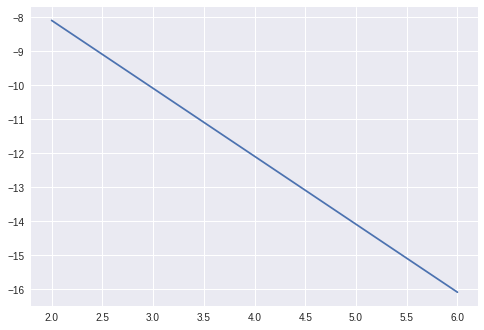

In [8]:
x_target = np.pi/4 #target point to be examined
y_target = -np.sin(x_target) #exact derivative value at the target point
nn = np.arange(2, 7)
hh = 1/np.power(2, nn) #step sizes to be taken
err = sfd(np.sin, x_target, hh) - y_target #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)


In [9]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('----->>>the convergence order is ' + str(-out[0]))

----->>>the convergence order is 1.999330824039844
